# 2D Generative Adversarial Network in Keras

Extension of the 1D GAN model to add another dimension to the predicted and generated variable.

This GAN model can be extended with any number of dimensions by adjusting the input of the discriminator, the output of the generator and the sample generation methods.

## Index
1. Defining a Discriminator Model
2. Defining a Generator Model
3. Training the Generator Model
4. Evaluating the Performance of the GAN
5. Running the GAN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

def calculate(x):
    return math.sin(x)

Using TensorFlow backend.


## 1. Define a Discriminator Model

In [148]:
def define_discriminator(n_inputs=3):
    model = Sequential()
    model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [149]:
model = define_discriminator()
model.summary()

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 25)                100       
_________________________________________________________________
dense_217 (Dense)            (None, 25)                650       
_________________________________________________________________
dense_218 (Dense)            (None, 1)                 26        
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


### Generate real and fake samples

In [131]:
def generate_real_samples(n=100):
    '''Generates random samples for f(x) from -pi to +pi and 2x as 3rd value'''
    X1 = (np.random.rand(n) - 0.5) * 2 * math.pi
    X2 = np.array([calculate(x) for x in X1])
    X3 = np.array([2*x for x in X1])
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X3 = X3.reshape(n, 1)
    X = np.hstack((X1, X2, X3))
    y = np.ones((n, 1))
    return X, y

def generate_fake_samples(n=100):
    '''Generates random samples from -pi to +pi that are not using f(x) for X2 and X3'''
    X1 = (np.random.rand(n) - 0.5) * 2 * math.pi
    X2 = (np.random.rand(n) - 0.5) * 2 * math.pi
    X3 = (np.random.rand(n) - 0.5) * 4 * math.pi
    X1 = X1.reshape(n, 1)
    X2 = X2.reshape(n, 1)
    X3 = X3.reshape(n, 1)
    X = np.hstack((X1, X2, X3))
    y = np.zeros((n, 1))
    return X, y

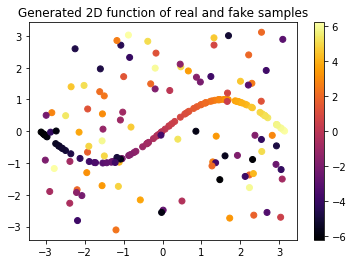

In [143]:
real_samples, y = generate_real_samples()
plt.scatter(real_samples[:, 0], real_samples[:, 1], c=real_samples[:,2], cmap='inferno')

fake_samples, y = generate_fake_samples()
plt.scatter(fake_samples[:, 0], fake_samples[:, 1], c=fake_samples[:,2], cmap='inferno')
plt.colorbar()
plt.title('Generated 2D function of real and fake samples');

### Train discriminator
- Update the model with generated data during training
- Generate 50% fake and 50% real samples for each training epoch

In [150]:
def train_discriminator(model, n_epochs=1000, n_batch=128):
    '''Manually run epochs for training with generated data'''
    half_batch = int(n_batch/2)
    epoch_hist_real = []
    epoch_hist_fake = []
    for i in range(0, n_epochs):
        X_real, y_real = generate_real_samples(half_batch)
        epoch_hist_real.append(model.train_on_batch(X_real, y_real))
        X_fake, y_fake = generate_fake_samples(half_batch)
        epoch_hist_fake.append(model.train_on_batch(X_fake, y_fake))
        _, acc_real = model.evaluate(X_real, y_real, verbose=0)
        _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
        print('Epoch {}: acc_real = {}, acc_fake = {}'.format(i, acc_real, acc_fake))
    return epoch_hist_real, epoch_hist_fake

In [151]:
model = define_discriminator()
epoch_hist_real, epoch_hist_fake = train_discriminator(model)

Epoch 0: acc_real = 0.109375, acc_fake = 0.890625
Epoch 1: acc_real = 0.15625, acc_fake = 0.9375
Epoch 2: acc_real = 0.203125, acc_fake = 0.953125
Epoch 3: acc_real = 0.234375, acc_fake = 0.9375
Epoch 4: acc_real = 0.28125, acc_fake = 0.84375
Epoch 5: acc_real = 0.375, acc_fake = 0.859375
Epoch 6: acc_real = 0.3125, acc_fake = 0.875
Epoch 7: acc_real = 0.34375, acc_fake = 0.890625
Epoch 8: acc_real = 0.46875, acc_fake = 0.890625
Epoch 9: acc_real = 0.5, acc_fake = 0.828125
Epoch 10: acc_real = 0.515625, acc_fake = 0.9375
Epoch 11: acc_real = 0.609375, acc_fake = 0.828125
Epoch 12: acc_real = 0.875, acc_fake = 0.828125
Epoch 13: acc_real = 0.984375, acc_fake = 0.78125
Epoch 14: acc_real = 1.0, acc_fake = 0.671875
Epoch 15: acc_real = 1.0, acc_fake = 0.84375
Epoch 16: acc_real = 1.0, acc_fake = 0.75
Epoch 17: acc_real = 1.0, acc_fake = 0.828125
Epoch 18: acc_real = 1.0, acc_fake = 0.796875
Epoch 19: acc_real = 1.0, acc_fake = 0.78125
Epoch 20: acc_real = 1.0, acc_fake = 0.828125
Epoch 21

Epoch 198: acc_real = 1.0, acc_fake = 0.90625
Epoch 199: acc_real = 1.0, acc_fake = 0.90625
Epoch 200: acc_real = 1.0, acc_fake = 0.9375
Epoch 201: acc_real = 1.0, acc_fake = 0.890625
Epoch 202: acc_real = 1.0, acc_fake = 0.890625
Epoch 203: acc_real = 1.0, acc_fake = 0.875
Epoch 204: acc_real = 1.0, acc_fake = 0.84375
Epoch 205: acc_real = 1.0, acc_fake = 0.9375
Epoch 206: acc_real = 1.0, acc_fake = 0.859375
Epoch 207: acc_real = 1.0, acc_fake = 0.921875
Epoch 208: acc_real = 1.0, acc_fake = 0.859375
Epoch 209: acc_real = 1.0, acc_fake = 0.875
Epoch 210: acc_real = 1.0, acc_fake = 0.90625
Epoch 211: acc_real = 1.0, acc_fake = 0.921875
Epoch 212: acc_real = 1.0, acc_fake = 0.9375
Epoch 213: acc_real = 1.0, acc_fake = 0.9375
Epoch 214: acc_real = 1.0, acc_fake = 0.921875
Epoch 215: acc_real = 1.0, acc_fake = 0.9375
Epoch 216: acc_real = 1.0, acc_fake = 0.921875
Epoch 217: acc_real = 1.0, acc_fake = 0.921875
Epoch 218: acc_real = 1.0, acc_fake = 0.921875
Epoch 219: acc_real = 1.0, acc_fa

Epoch 407: acc_real = 1.0, acc_fake = 0.953125
Epoch 408: acc_real = 1.0, acc_fake = 0.890625
Epoch 409: acc_real = 1.0, acc_fake = 0.90625
Epoch 410: acc_real = 1.0, acc_fake = 1.0
Epoch 411: acc_real = 1.0, acc_fake = 0.890625
Epoch 412: acc_real = 1.0, acc_fake = 0.90625
Epoch 413: acc_real = 1.0, acc_fake = 0.890625
Epoch 414: acc_real = 1.0, acc_fake = 0.9375
Epoch 415: acc_real = 1.0, acc_fake = 0.984375
Epoch 416: acc_real = 1.0, acc_fake = 0.890625
Epoch 417: acc_real = 1.0, acc_fake = 0.96875
Epoch 418: acc_real = 1.0, acc_fake = 0.859375
Epoch 419: acc_real = 1.0, acc_fake = 0.9375
Epoch 420: acc_real = 1.0, acc_fake = 0.953125
Epoch 421: acc_real = 1.0, acc_fake = 0.9375
Epoch 422: acc_real = 1.0, acc_fake = 0.875
Epoch 423: acc_real = 1.0, acc_fake = 0.921875
Epoch 424: acc_real = 1.0, acc_fake = 0.828125
Epoch 425: acc_real = 1.0, acc_fake = 0.96875
Epoch 426: acc_real = 1.0, acc_fake = 0.953125
Epoch 427: acc_real = 1.0, acc_fake = 0.953125
Epoch 428: acc_real = 1.0, acc_

Epoch 588: acc_real = 1.0, acc_fake = 0.96875
Epoch 589: acc_real = 1.0, acc_fake = 0.984375
Epoch 590: acc_real = 1.0, acc_fake = 0.921875
Epoch 591: acc_real = 1.0, acc_fake = 0.984375
Epoch 592: acc_real = 1.0, acc_fake = 0.9375
Epoch 593: acc_real = 1.0, acc_fake = 1.0
Epoch 594: acc_real = 1.0, acc_fake = 1.0
Epoch 595: acc_real = 1.0, acc_fake = 0.96875
Epoch 596: acc_real = 1.0, acc_fake = 0.90625
Epoch 597: acc_real = 1.0, acc_fake = 0.984375
Epoch 598: acc_real = 1.0, acc_fake = 0.921875
Epoch 599: acc_real = 1.0, acc_fake = 1.0
Epoch 600: acc_real = 1.0, acc_fake = 0.9375
Epoch 601: acc_real = 1.0, acc_fake = 0.953125
Epoch 602: acc_real = 1.0, acc_fake = 0.921875
Epoch 603: acc_real = 1.0, acc_fake = 0.953125
Epoch 604: acc_real = 1.0, acc_fake = 0.9375
Epoch 605: acc_real = 1.0, acc_fake = 0.953125
Epoch 606: acc_real = 1.0, acc_fake = 0.921875
Epoch 607: acc_real = 1.0, acc_fake = 0.96875
Epoch 608: acc_real = 1.0, acc_fake = 1.0
Epoch 609: acc_real = 1.0, acc_fake = 0.937

Epoch 789: acc_real = 1.0, acc_fake = 0.96875
Epoch 790: acc_real = 1.0, acc_fake = 0.96875
Epoch 791: acc_real = 1.0, acc_fake = 0.953125
Epoch 792: acc_real = 1.0, acc_fake = 0.953125
Epoch 793: acc_real = 1.0, acc_fake = 0.953125
Epoch 794: acc_real = 1.0, acc_fake = 0.96875
Epoch 795: acc_real = 1.0, acc_fake = 0.96875
Epoch 796: acc_real = 1.0, acc_fake = 0.96875
Epoch 797: acc_real = 1.0, acc_fake = 0.96875
Epoch 798: acc_real = 1.0, acc_fake = 0.921875
Epoch 799: acc_real = 1.0, acc_fake = 0.953125
Epoch 800: acc_real = 1.0, acc_fake = 0.96875
Epoch 801: acc_real = 1.0, acc_fake = 0.96875
Epoch 802: acc_real = 1.0, acc_fake = 0.96875
Epoch 803: acc_real = 1.0, acc_fake = 0.9375
Epoch 804: acc_real = 1.0, acc_fake = 0.953125
Epoch 805: acc_real = 1.0, acc_fake = 0.921875
Epoch 806: acc_real = 1.0, acc_fake = 0.96875
Epoch 807: acc_real = 1.0, acc_fake = 0.984375
Epoch 808: acc_real = 1.0, acc_fake = 1.0
Epoch 809: acc_real = 1.0, acc_fake = 0.984375
Epoch 810: acc_real = 1.0, acc

Epoch 992: acc_real = 1.0, acc_fake = 0.890625
Epoch 993: acc_real = 1.0, acc_fake = 0.890625
Epoch 994: acc_real = 1.0, acc_fake = 0.96875
Epoch 995: acc_real = 1.0, acc_fake = 0.984375
Epoch 996: acc_real = 1.0, acc_fake = 0.984375
Epoch 997: acc_real = 1.0, acc_fake = 0.953125
Epoch 998: acc_real = 1.0, acc_fake = 0.953125
Epoch 999: acc_real = 1.0, acc_fake = 0.9375


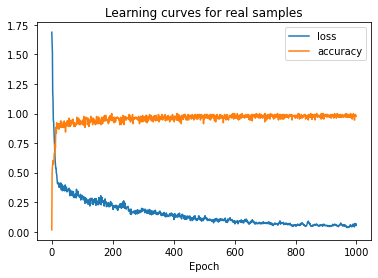

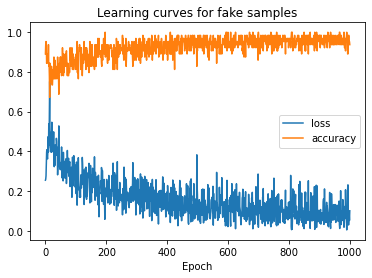

In [152]:
plt.title('Learning curves for real samples')
plt.xlabel('Epoch')
plt.plot(epoch_hist_real)
plt.legend(model.metrics_names)
plt.show()

plt.title('Learning curves for fake samples')
plt.xlabel('Epoch')
plt.plot(epoch_hist_fake)
plt.legend(model.metrics_names)
plt.show();

## 3. Define a Generator Model

In [153]:
def define_generator(latent_dim, n_outputs=3):
    model = Sequential()
    model.add(Dense(4, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    return model

model = define_generator(5)
model.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 4)                 24        
_________________________________________________________________
dense_223 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_224 (Dense)            (None, 3)                 15        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [159]:
def generate_latent_points(latent_dim, n):
    '''Generate points in latent space: return n rows of latent_dim points as input for the network.'''
    x_input = np.random.randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim)
    return x_input

def generate_fake_points(generator, latent_dim, n):
    '''Generate fake points based on input from latent space.'''
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    # Disable plotting for training, otherwise outputs 1 plot per epoch!
    #plt.scatter(X[:, 0], X[:, 1], c=X[:,2], cmap='plasma')
    #plt.colorbar()
    #plt.show()    
    y = np.zeros((n, 1))
    return X, y

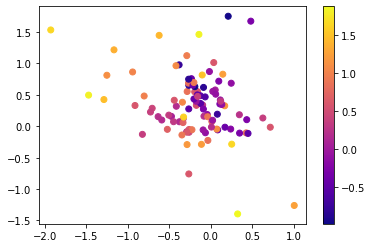

In [130]:
latent_dim = 5
model = define_generator(latent_dim)
generate_fake_points(model, latent_dim, 100);

## 4. Training the Generator Model

In [154]:
def define_gan(generator, discriminator):
    '''Defines an overall stacked model from the generator and discriminator, with the later tagged as untrainable.'''
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [155]:
latent_dim = 5
discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
gan_model.summary();

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_77 (Sequential)   (None, 3)                 59        
_________________________________________________________________
sequential_76 (Sequential)   (None, 1)                 776       
Total params: 835
Trainable params: 59
Non-trainable params: 776
_________________________________________________________________


In [156]:
def train_gan(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
    '''Train generator and discriminator models.'''
    half_batch = int(n_batch/2)
    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_points(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)    
    return

## 5. Evaluating the Performance of the GAN

Epoch 0: acc_real = 0.41, acc_fake = 0.92


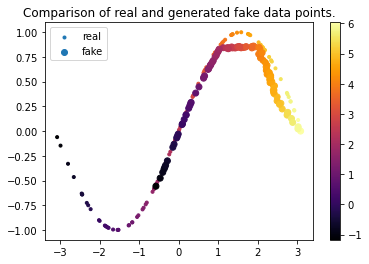

In [203]:
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
    X_real, y_real = generate_real_samples(n)
    _, acc_real = discriminator.evaluate(X_real, y_real, verbose=0)
    X_fake, y_fake = generate_fake_points(generator, latent_dim, n)
    _, acc_fake = discriminator.evaluate(X_fake, y_fake, verbose=0)
    print('Epoch {}: acc_real = {:.2}, acc_fake = {:.2}'.format(epoch, acc_real, acc_fake))
    plt.title('Comparison of real and generated fake data points.')
    leg_real = plt.scatter(X_real[:, 0], X_real[:, 1], marker='.', c=X_real[:,2], cmap='inferno')
    leg_fake = plt.scatter(X_fake[:, 0], X_fake[:, 1], marker='o', c=X_fake[:,2], cmap='inferno')
    plt.legend((leg_real, leg_fake), ('real', 'fake'))
    plt.colorbar()
    plt.show()
    return

summarize_performance(0, generator, discriminator, latent_dim)

In [206]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=2000):
    '''Train generator and discriminator models.'''
    half_batch = int(n_batch/2)
    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(half_batch)
        x_fake, y_fake = generate_fake_points(g_model, latent_dim, half_batch)
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = np.ones((n_batch, 1))
        gan_model.train_on_batch(x_gan, y_gan)
        if ((i+1) % n_eval == 0) or ((i == 0)):
            summarize_performance(i+1, g_model, d_model, latent_dim)
    #summarize_performance(i+1, g_model, d_model, latent_dim)
    return

## 6. Running the model

Epoch 1: acc_real = 1.0, acc_fake = 0.0


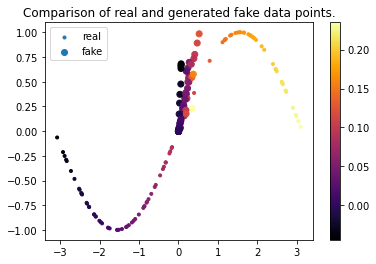

Epoch 2000: acc_real = 0.61, acc_fake = 0.87


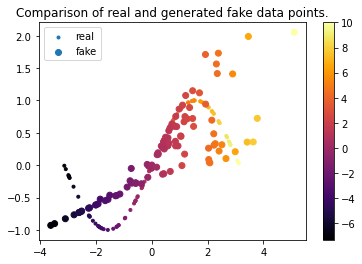

Epoch 4000: acc_real = 0.63, acc_fake = 0.69


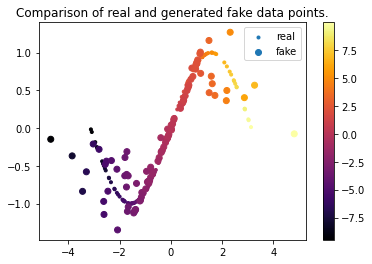

Epoch 6000: acc_real = 0.59, acc_fake = 0.68


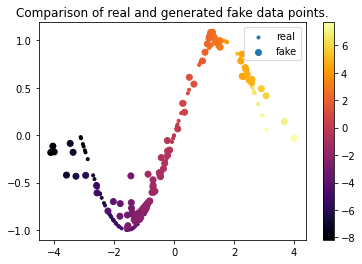

Epoch 8000: acc_real = 0.62, acc_fake = 0.59


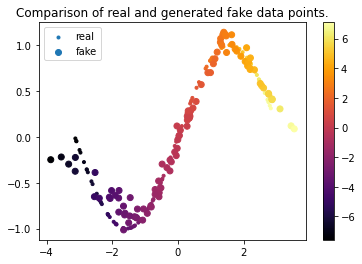

Epoch 10000: acc_real = 0.68, acc_fake = 0.71


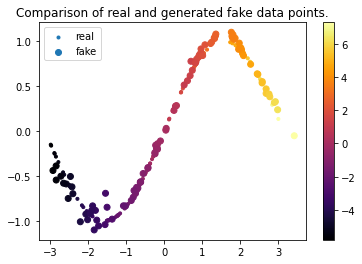

Epoch 12000: acc_real = 0.43, acc_fake = 0.86


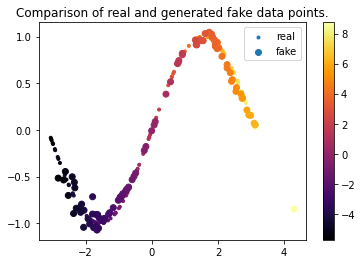

In [207]:
latent_dim = 5
n_epochs = 12000
n_batch = 256
n_eval = 2000

discriminator = define_discriminator()
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train(generator, discriminator, gan_model, latent_dim, n_epochs, n_batch, n_eval)
#train(generator, discriminator, gan_model, latent_dim)